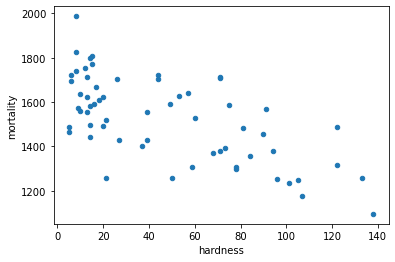

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('water.csv')
data.plot(kind = 'scatter', x = 'hardness', y = 'mortality')
plt.show()

обратное направление корреляции

In [43]:
data[['hardness', 'mortality']].corr() #коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [44]:
data[['hardness', 'mortality']].corr(method = 'spearman') #коэффициент корреляции Спирмана

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


корреляция имеет отрицательное значение, следовательно при уменьшении жесткости воды, смертность увеличивается, линейная связь слабая.

In [45]:
x = data[['hardness']]
y = data['mortality']

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
model.fit(x_train, y_train)
model.coef_ #k в уравнении kx + b

array([-3.13167087])

In [46]:
model.intercept_ #b в уравнении kx + b

1668.9722977277095

In [47]:
model.score(x_test, y_test) #коэффициент детерминации обученной модели 

0.5046490611017092

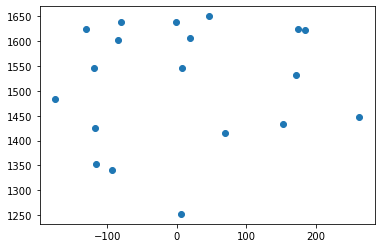

In [49]:
y_pred = model.predict(x_test)
y_diff = y_test - y_pred
plt.scatter(y_diff, y_pred)
plt.show()

остатки ведут себя хаотично, нет систематической направленности и выбросов, следовательно модель адекватна.

Общий вывод: чем выше жесткость воды, т.е. чем выше содержание в ней растворённых солей щёлочноземельных металлов, главным образом кальция и магния, тем меньше смертность населения. 